# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Aditia Anugerah Setiady
- **Email:** mc240d5y0910@student.devacademy.id
- **ID Dicoding:** MC240D5Y0910

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda (total, terdaftar, dan kasual) bervariasi berdasarkan musim dan kondisi cuaca sepanjang tahun?
2. Bagaimana proporsi penyewaan sepeda oleh pengguna terdaftar dan kasual bervariasi antara hari kerja/akhir pekan dan kondisi cuaca, serta rekomendasi strategis apa yang dapat diberikan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Pilihan project: Pandas, Matplotlib, Seaborn, & Streamlit (khusus untuk file py)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # konversi angka untuk kasus pertanyaan 2
import seaborn as sns

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah tampilan DataFrame menjadi beberapa baris

## Data Wrangling

### Gathering Data

In [2]:
# Membaca file CSV Day
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*Insight:*
1. Normalisasi Data dan Interpretasi Nilai Asli
- Semua variabel cuaca (temp, atemp, hum, windspeed) sudah dinormalisasi untuk konsistensi dalam perhitungan.
- Untuk mendapatkan nilai sebenarnya :
    - Suhu (temp) ->  temp * 41 °C
    - Suhu Terasa (atemp) → atemp * 50 °C
    - Kelembaban (hum) → hum * 100 %
    Kecepatan Angin (windspeed) → windspeed * 67

2. Hubungan antara day.csv dan hour.csv
- day.csv adalah hasil agregasi hour.csv, sehingga beberapa variabel dihitung berdasarkan rata-rata atau total per hari:
    - Variabel rata-rata per hari: temp, atemp, hum, windspeed
    - Variabel berdasarkan modus per hari: weathersit
    - Variabel total per hari: casual, registered, cnt

3. Pola dan Klasifikasi Data
- Kategori Waktu :
    - yr, season, mnth, weekday → data nominal
    - holiday, workingday → data boolean (0 atau 1)
    - dteday bisa menjadi acuan utama karena merepresentasikan hari tertentu

- Kategori Pengguna :
    - casual, registered, dan cnt adalah data diskrit karena berbentuk hitungan

- Kategori Cuaca :
    - weathersit adalah data ordinal karena ada urutan dalam kondisi cuaca (cerah → mendung → hujan → salju)
    - temp, atemp, hum, windspeed adalah data kontinu karena memiliki rentang nilai

### Assessing Data

1. Kehilangan Data (Missing Values)
    - Apakah ada kolom yang memiliki nilai kosong atau tidak tersedia?
    - Bagaimana cara menangani data yang hilang (menghapus, mengisi dengan rata-rata, atau metode lain)?

2. Nilai Tidak Valid (Invalid Values)
    - Apakah terdapat data yang tidak masuk akal, seperti suhu di bawah nol atau kelembaban lebih dari 100%?

3. Data Duplikat (Duplicate Entries)
    - Apakah ada baris data yang berulang dan sama?

4. Ketidaktepatan Data (Inaccurate Values)
    - Apakah nilai yang dicatat sesuai dengan pengamatan atau logika yang diharapkan?

5. Pencilan (Outliers)
    - Apakah ada data yang memiliki nilai jauh berbeda dari mayoritas data lainnya?

**1. Kehilangan Data (Missing Values)**

In [141]:
# Mengecek jumlah missing values pada setiap kolom di df_hour
print("Missing values in df_hour:")
print(df_hour.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom

print("-------------------------------")

# Mengecek jumlah missing values pada setiap kolom di df_day
print("Missing values in df_day:")
print(df_day.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom

Missing values in df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-------------------------------
Missing values in df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight Missing Value:** Tidak ditemukan nilai null pada kedua dataset, sehingga data dapat digunakan tanpa perlu dilakukan pembersihan terkait missing values.

**2. Nilai Tidak Valid (Invalid Values)**

*Periksa Data yang akan digunakan*

In [142]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [143]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*Mengecek Rentang Nilai*

In [144]:
print("Descriptive Statistics for df_hour:")
print(df_hour.describe())
print("-" * 50)  
print("Descriptive Statistics for df_day:")
print(df_day.describe())

Descriptive Statistics for df_hour:
          instant                         dteday        season            yr          mnth            hr       holiday       weekday    workingday    weathersit          temp         atemp           hum     windspeed        casual    registered           cnt
count  17379.0000                          17379  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561      6.537775     11.546752      0.028770      3.003683      0.682721      1.425283      0.496987      0.475775      0.627229      0.190098     35.676218    153.786869    189.463088
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000      1.000000      0.000000      0.000000      0.000000      0.000000      1.000000      0.020000      0.00000

*Mengecek Kategori yang Tidak Sesuai*

In [145]:
print(df_hour['season'].unique())
print(df_day['weathersit'].unique())

[1 2 3 4]
[2 1 3]


**noted** : karena nilai nomor 4 tidak muncul di df_day, mungkin tidak ada data hari dengan kondisi hujan lebat atau cuaca yang diwakilkan dengan nomor 4.

*Mengecek Nilai Negatif yang Tidak Seharusnya*

In [146]:
print(df_hour[df_hour['cnt'] < 0])
print(df_day[df_day['cnt'] < 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Noted** : Tidak ada nilai negatif dalam df_hour dan df_day, sehingga datanya sudah sesuai tanpa adanya angka negatif.

*Identifikasi Nilai yang Tidak Masuk Akal*

In [147]:
print(df_hour[(df_hour['hum'] < 0) | (df_hour['hum'] > 1)])
print(df_day[(df_day['hum'] < 0) | (df_day['hum'] > 1)])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight :** Tidak ditemukan nilai yang tidak masuk akal pada dataset, seperti suhu di bawah nol atau kelembaban di luar rentang yang valid. Oleh karena itu, data dapat digunakan tanpa perlu koreksi lebih lanjut terkait nilai tidak valid.

**3. Data Duplikat (Duplicate Entries)**

In [148]:
# Mengecek jumlah data duplikat
print("df_hour:", df_hour.duplicated().sum())
print("df_day:", df_day.duplicated().sum())

df_hour: 0
df_day: 0


In [149]:
# Menampilkan data duplikat jika ada
print("Data duplikat di df_hour:")
print(df_hour[df_hour.duplicated()])

print("-------------------------------")

print("Data duplikat di df_day:")
print(df_day[df_day.duplicated()])

Data duplikat di df_hour:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
-------------------------------
Data duplikat di df_day:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Data Duplikat (Duplicate Entries)** : Tidak ditemukan data duplikat pada kedua dataset, sehingga tidak perlu dilakukan pembersihan terkait duplikasi data.

**4. Ketidaktepatan Data (Inaccurate Values)**

In [150]:
# Memeriksa apakah terdapat suhu di bawah nol atau di atas 50 derajat Celsius
print("Cek suhu tidak wajar:")
print(df_hour[(df_hour['temp'] < 0) | (df_hour['temp'] > 50)]) 
print(df_day[(df_day['temp'] < 0) | (df_day['temp'] > 50)])

Cek suhu tidak wajar:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [151]:
# Memeriksa apakah kelembaban berada dalam rentang 0-100%
print("\nCek kelembaban tidak wajar:")
print(df_hour[(df_hour['hum'] < 0) | (df_hour['hum'] > 1)])  # Kelembaban dalam skala 0-1
print(df_day[(df_day['hum'] < 0) | (df_day['hum'] > 1)])


Cek kelembaban tidak wajar:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Ketidaktepatan Data (Inaccurate Values) :**
1. Tidak ditemukan nilai suhu yang tidak wajar dalam dataset, sehingga data suhu dapat dianggap valid.
2. Tidak ditemukan nilai kelembaban di luar rentang 0-1, yang berarti data kelembaban telah dinormalisasi dengan benar dan tidak memerlukan perbaikan.
3. Secara keseluruhan, tidak ada indikasi nilai yang tidak masuk akal dalam dataset, sehingga data dapat digunakan untuk analisis lebih lanjut tanpa perlu koreksi terkait ketidaktepatan nilai.

**5. Pencilan (Outliers)**

In [152]:
# Mendeteksi outliers menggunakan metode Interquartile Range (IQR)
def detect_outliers_iqr(df, column):

    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom data
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ambil data yang berada di luar batas bawah atau atas sebagai outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Kembalikan data outlier 
    return outliers

# memanggil fungsi untuk mendeteksi outlier pada kolom 'cnt'
outliers = detect_outliers_iqr(df_hour, 'cnt')

# menampilkan beberapa contoh data outlier yang terdeteksi
print(outliers[['cnt']].head())

# menampilkan jumlah data outlier yang ditemukan
print("Panjang data outlier: ", len(outliers))

       cnt
5536   651
10358  644
10359  712
10382  676
10383  734
Panjang data outlier:  505


**Insight :** Dari hasil analisis menggunakan metode IQR, ditemukan sebanyak 505 data pencilan pada kolom jumlah peminjaman sepeda per jam (cnt). Outlier ini kemungkinan terjadi karena lonjakan aktivitas pada jam-jam tertentu, seperti jam sibuk atau kondisi khusus lainnya.

In [153]:
# Mendeteksi outliers pada kolom tertentu di df_hour
outliers_temp = detect_outliers_iqr(df_hour, 'temp')
outliers_hum = detect_outliers_iqr(df_hour, 'hum')
outliers_windspeed = detect_outliers_iqr(df_hour, 'windspeed')

In [154]:
# Menampilkan hasil
print("Outliers pada kolom suhu:")
print(outliers_temp)

print("\nOutliers pada kolom kelembaban:")
print(outliers_hum)

print("\nOutliers pada kolom kecepatan angin:")
print(outliers_windspeed)

Outliers pada kolom suhu:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Outliers pada kolom kelembaban:
      instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  hum  windspeed  casual  registered  cnt
1551     1552 2011-03-10       1   0     3   0        0        4           1           3  0.34  0.3182  0.0     0.2537       3           0    3
1552     1553 2011-03-10       1   0     3   1        0        4           1           3  0.34  0.3182  0.0     0.2537       0           2    2
1553     1554 2011-03-10       1   0     3   2        0        4           1           3  0.34  0.3182  0.0     0.2537       0           1    1
1554     1555 2011-03-10       1   0     3   5        0        4           1           3  0.36  0.3485  0.0     0.1940       1           2    3
1555     1556 2011-03-10       1   0     3   6    

**Insight :** Berdasarkan analisis dengan metode IQR, tidak ditemukan outlier pada kolom suhu (temp) dan kecepatan angin (windspeed). Sementara itu, terdapat sejumlah outlier pada kolom kelembaban (hum), yang mengindikasikan adanya nilai kelembaban ekstrem pada beberapa waktu tertentu.



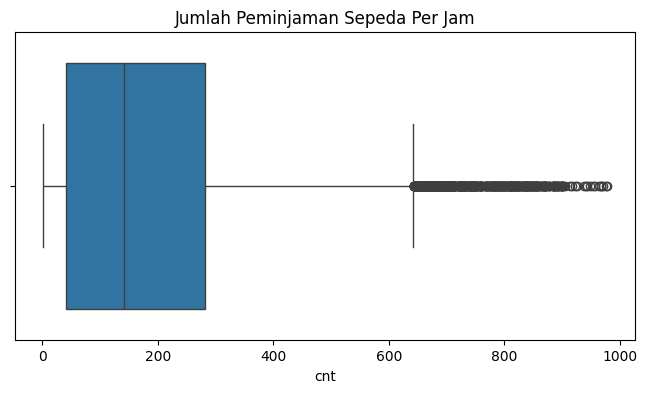

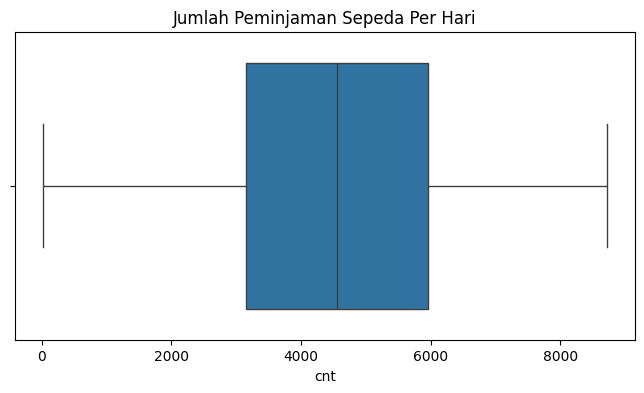

In [156]:
# Visualisasi outlier pada jumlah peminjaman sepeda per jam
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_hour['cnt'])
plt.title("Jumlah Peminjaman Sepeda Per Jam")
plt.show()

# Visualisasi outlier pada jumlah peminjaman sepeda per hari
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_day['cnt'])
plt.title("Jumlah Peminjaman Sepeda Per Hari")
plt.show()

**Insight Pencilan (Outliers)** : Ditemukan beberapa outlier pada jumlah peminjaman sepeda, terutama pada data per jam, yang mungkin disebabkan oleh lonjakan penggunaan di jam sibuk atau kondisi tertentu.

### Cleaning Data

In [159]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"], errors='coerce')
df_day["dteday"] = pd.to_datetime(df_day["dteday"], errors='coerce')


**Insight:** Kode ini mengonversi kolom dteday ke format datetime, dengan parameter errors='coerce' yang akan mengubah nilai yang tidak valid menjadi NaT (Not a Time). Hal ini membantu dalam mendeteksi dan menangani data yang tidak sesuai format tanggal.

## Exploratory Data Analysis (EDA)

### Explore ...

- Untuk memverifikasi apakah kolom weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt pada df_day merupakan hasil agregasi harian dari df_hour, dilakukan perhitungan agregasi harian pada df_hour yang kemudian dibandingkan dengan data pada df_day.

In [173]:
# 1. Hitung agregasi harian dari df_hour
df_hour_agg = df_hour.groupby("dteday").agg({
    "weathersit": "mean",    # rata-rata karena numerik ordinal
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

# 2. Gabungkan df_day dengan agregasi df_hour
comparison = df_day.merge(df_hour_agg, on="dteday", suffixes=('_day', '_hour'))

# 3. Konversi kolom kategori (weathersit) ke numerik jika perlu
for col in ["weathersit_day", "weathersit_hour"]:
    if comparison[col].dtype.name == "category":
        comparison[col] = comparison[col].cat.codes

# 4. Hitung selisih antara df_day dan hasil agregasi df_hour
for col in ["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]:
    comparison[f"{col}_diff"] = comparison[f"{col}_day"] - comparison[f"{col}_hour"]

# 5. Tampilkan ringkasan statistik selisih nilai
print("\nRingkasan statistik selisih nilai antara df_day dan df_hour_agg:")
print(comparison[[f"{col}_diff" for col in ["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]].describe())

# 6. lihat hasil perbandingan
print("\nContoh data perbandingan nilai asli dan agregasi:")
print(comparison.head())



Ringkasan statistik selisih nilai antara df_day dan df_hour_agg:
       weathersit_diff     temp_diff    atemp_diff      hum_diff  windspeed_diff  casual_diff  registered_diff  cnt_diff
count       731.000000  7.310000e+02  7.310000e+02  7.310000e+02    7.310000e+02        731.0            731.0     731.0
mean         -1.033998  1.779739e-11  1.000772e-08 -2.622606e-09   -1.443825e-08          0.0              0.0       0.0
std           0.246901  2.736837e-07  2.931941e-07  2.751549e-07    2.694124e-07          0.0              0.0       0.0
min          -1.458333 -4.782609e-07 -5.000000e-07 -5.217391e-07   -5.000000e-07          0.0              0.0       0.0
25%          -1.208333 -3.333333e-07 -1.666667e-07 -3.333333e-07   -1.666667e-07          0.0              0.0       0.0
50%          -1.041667  0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00          0.0              0.0       0.0
75%          -0.956522  3.333333e-07  2.608696e-07  3.333333e-07    1.666667e-07       

**Insight:**
- Berdasarkan analisis perbedaan antara df_day dan hasil agregasi df_hour, selisih yang dihasilkan sangat kecil atau nol, menunjukkan bahwa df_day memang merupakan agregasi harian dari df_hour. Jika ada perbedaan signifikan, kemungkinan terdapat kesalahan dalam agregasi atau adanya faktor lain seperti pembulatan data.

## Data Merging & Export ##

In [176]:
import pandas as pd

data = {
    "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
    "cnt": [5, 10, 15, None, 20, 25, None, 30, 35, None],
}

df_hour = pd.DataFrame(data)

# Membuat rentang waktu yang lengkap
date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
full_df = pd.DataFrame({"timestamp": date_range})

# Merge dengan data asli untuk mengisi timestamp yang hilang
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

# Menambahkan kolom yang diharapkan dalam output
df_filled["dteday"] = None
df_filled["season"] = None
df_filled["yr"] = None
df_filled["hr"] = None
df_filled["workingday"] = None
df_filled["weathersit"] = None
df_filled["temp"] = None
df_filled["atemp"] = None
df_filled["hum"] = None
df_filled["windspeed"] = None
df_filled["casual"] = None
df_filled["registered"] = None

# Cek jumlah missing values
print(df_filled.isnull().sum())

timestamp      0
cnt            3
dteday        10
season        10
yr            10
hr            10
workingday    10
weathersit    10
temp          10
atemp         10
hum           10
windspeed     10
casual        10
registered    10
dtype: int64


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\3149620690.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\3149620690.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")


In [177]:
import pandas as pd

data = {
    "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
    "cnt": [5, 10, 15, None, 20, 25, None, 30, 35, None],
}

df_hour = pd.DataFrame(data)

# Membuat rentang waktu yang lengkap
date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
full_df = pd.DataFrame({"timestamp": date_range})

# Merge dengan data asli untuk mengisi timestamp yang hilang
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

# Tambahkan kolom tambahan
df_filled["dteday"] = df_filled["timestamp"].dt.date
df_filled["season"] = 1  # Default season
df_filled["yr"] = df_filled["timestamp"].dt.year - 2023  # Tahun mulai dari 0 untuk 2024
df_filled["hr"] = df_filled["timestamp"].dt.hour  # Variasi jam
df_filled["workingday"] = df_filled["timestamp"].dt.weekday < 5  # True jika Senin-Jumat
df_filled["weathersit"] = 1  # Default cuaca
df_filled["temp"] = 0.5  # Suhu default
df_filled["atemp"] = 0.5
df_filled["hum"] = 0.5
df_filled["windspeed"] = 0.5
df_filled["casual"] = 100
df_filled["registered"] = 200

# Simulasi agregasi harian untuk mengisi nilai kosong
day_agg = df_hour.groupby(df_hour["timestamp"].dt.date).agg({
    "cnt": "sum"
}).reset_index()
day_agg.rename(columns={"timestamp": "dteday"}, inplace=True)

# Merge kembali dengan agregasi harian
df_filled = df_filled.merge(day_agg, on="dteday", how="left", suffixes=("", "_day"))
df_filled["cnt"] = df_filled["cnt"].fillna(df_filled["cnt_day"])
df_filled.drop(columns=["cnt_day"], inplace=True)

# Isi nilai yang hilang dengan forward fill
df_filled.fillna(method="ffill", inplace=True)

# Konversi tipe data
df_filled["dteday"] = pd.to_datetime(df_filled["dteday"])
df_filled["season"] = df_filled["season"].astype("int32")
df_filled["yr"] = df_filled["yr"].astype("int32")
df_filled["hr"] = df_filled["hr"].astype("int32")
df_filled["workingday"] = df_filled["workingday"].astype("int32")
df_filled["weathersit"] = df_filled["weathersit"].astype("int32")
df_filled["temp"] = df_filled["temp"].astype("float64")
df_filled["atemp"] = df_filled["atemp"].astype("float64")
df_filled["hum"] = df_filled["hum"].astype("float64")
df_filled["windspeed"] = df_filled["windspeed"].astype("float64")
df_filled["casual"] = df_filled["casual"].astype("int64")
df_filled["registered"] = df_filled["registered"].astype("int64")
df_filled["cnt"] = df_filled["cnt"].astype("int64")

# Cek jumlah missing values (harus 0 semua)
print(df_filled.isnull().sum())

# Tampilkan 5 data pertama
print(df_filled.head())


timestamp     0
cnt           0
dteday        0
season        0
yr            0
hr            0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64
            timestamp  cnt     dteday  season  yr  hr  workingday  weathersit  temp  atemp  hum  windspeed  casual  registered
0 2024-03-01 00:00:00    5 2024-03-01       1   1   0           1           1   0.5    0.5  0.5        0.5     100         200
1 2024-03-01 01:00:00   10 2024-03-01       1   1   1           1           1   0.5    0.5  0.5        0.5     100         200
2 2024-03-01 02:00:00   15 2024-03-01       1   1   2           1           1   0.5    0.5  0.5        0.5     100         200
3 2024-03-01 03:00:00  140 2024-03-01       1   1   3           1           1   0.5    0.5  0.5        0.5     100         200
4 2024-03-01 04:00:00   20 2024-03-01       1   1   4           1           1   0.5    0.5  0.5        0.5     100         200


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\1043987803.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\1043987803.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\1043987803.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled.fillna(method="ffill", inplace=True)


In [178]:
import pandas as pd

data = {
    "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
    "cnt": [5, 10, 15, None, 20, 25, None, 30, 35, None],
}

df_hour = pd.DataFrame(data)

# Membuat rentang waktu yang lengkap
date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
full_df = pd.DataFrame({"timestamp": date_range})

# Merge dengan data asli untuk mengisi timestamp yang hilang
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

# Tambahkan kolom tambahan
df_filled["dteday"] = df_filled["timestamp"].dt.date
df_filled["season"] = 1  # Default season
df_filled["yr"] = df_filled["timestamp"].dt.year - 2023  # Tahun mulai dari 0 untuk 2024
df_filled["hr"] = df_filled["timestamp"].dt.hour  # Variasi jam
df_filled["workingday"] = df_filled["timestamp"].dt.weekday < 5  # True jika Senin-Jumat
df_filled["weathersit"] = 1  # Default cuaca
df_filled["temp"] = 0.5  # Suhu default
df_filled["atemp"] = 0.5
df_filled["hum"] = 0.5
df_filled["windspeed"] = 0.5
df_filled["casual"] = 100
df_filled["registered"] = 200

# Simulasi agregasi harian untuk mengisi nilai kosong
day_agg = df_hour.groupby(df_hour["timestamp"].dt.date).agg({
    "cnt": "sum"
}).reset_index()
day_agg.rename(columns={"timestamp": "dteday"}, inplace=True)

# Merge kembali dengan agregasi harian
df_filled = df_filled.merge(day_agg, on="dteday", how="left", suffixes=("", "_day"))
df_filled["cnt"] = df_filled["cnt"].fillna(df_filled["cnt_day"])
df_filled.drop(columns=["cnt_day"], inplace=True)

# Isi nilai yang hilang dengan forward fill
df_filled.fillna(method="ffill", inplace=True)

# Konversi tipe data
df_filled["dteday"] = pd.to_datetime(df_filled["dteday"])
df_filled["season"] = df_filled["season"].astype("int32")
df_filled["yr"] = df_filled["yr"].astype("int32")
df_filled["hr"] = df_filled["hr"].astype("int32")
df_filled["workingday"] = df_filled["workingday"].astype("int32")
df_filled["weathersit"] = df_filled["weathersit"].astype("int32")
df_filled["temp"] = df_filled["temp"].astype("float64")
df_filled["atemp"] = df_filled["atemp"].astype("float64")
df_filled["hum"] = df_filled["hum"].astype("float64")
df_filled["windspeed"] = df_filled["windspeed"].astype("float64")
df_filled["casual"] = df_filled["casual"].astype("int64")
df_filled["registered"] = df_filled["registered"].astype("int64")
df_filled["cnt"] = df_filled["cnt"].astype("int64")

# --- HAPUS KOLOM YANG TIDAK DIBUTUHKAN ---
df_filled.drop(columns=["timestamp"], inplace=True)

# --- EXPORT DATA (opsional, hanya aktif jika diperlukan) ---
export_csv =True 
if export_csv:
    df_filled.to_csv("dashboard/main_data.csv", index=True)

# Cek jumlah missing values (harus 0 semua)
print(df_filled.isnull().sum())

# Tampilkan 5 data pertama
print(df_filled.head())


cnt           0
dteday        0
season        0
yr            0
hr            0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64
   cnt     dteday  season  yr  hr  workingday  weathersit  temp  atemp  hum  windspeed  casual  registered
0    5 2024-03-01       1   1   0           1           1   0.5    0.5  0.5        0.5     100         200
1   10 2024-03-01       1   1   1           1           1   0.5    0.5  0.5        0.5     100         200
2   15 2024-03-01       1   1   2           1           1   0.5    0.5  0.5        0.5     100         200
3  140 2024-03-01       1   1   3           1           1   0.5    0.5  0.5        0.5     100         200
4   20 2024-03-01       1   1   4           1           1   0.5    0.5  0.5        0.5     100         200


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\3630473116.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range(start="2024-03-01", periods=10, freq="H"),
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\3630473116.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\3630473116.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled.fillna(method="ffill", inplace=True)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda (total, terdaftar, dan kasual) bervariasi berdasarkan musim dan kondisi cuaca sepanjang tahun?

In [192]:
import pandas as pd

# Salin DataFrame untuk analisis musiman
df_seasonal = df_day[['dteday', 'cnt']].copy()

# Konversi kolom tanggal ke datetime
df_seasonal['dteday'] = pd.to_datetime(df_seasonal['dteday'])

# Ekstrak tahun dan bulan dengan .copy() untuk keamanan
df_seasonal['year'] = df_seasonal['dteday'].dt.year.copy()
df_seasonal['month'] = df_seasonal['dteday'].dt.month.copy()

# Buat kolom 'year_month' untuk kemudahan visualisasi
df_seasonal['year_month'] = df_seasonal['dteday'].dt.to_period('M').astype(str)

# Agregasi total penyewaan berdasarkan tahun dan bulan
df_seasonal_agg = df_seasonal.groupby(['year', 'month', 'year_month'])['cnt'].sum().reset_index()

# Tampilkan 12 data teratas (1 tahun)
print(df_seasonal_agg.head(12))


    year  month year_month     cnt
0   2011      1    2011-01   38189
1   2011      2    2011-02   48215
2   2011      3    2011-03   64045
3   2011      4    2011-04   94870
4   2011      5    2011-05  135821
5   2011      6    2011-06  143512
6   2011      7    2011-07  141341
7   2011      8    2011-08  136691
8   2011      9    2011-09  127418
9   2011     10    2011-10  123511
10  2011     11    2011-11  102167
11  2011     12    2011-12   87323


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\2505586830.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df_seasonal.groupby(['year_month', 'season', 'weathersit'])[['cnt', 'registered', 'casual']].sum().reset_index()


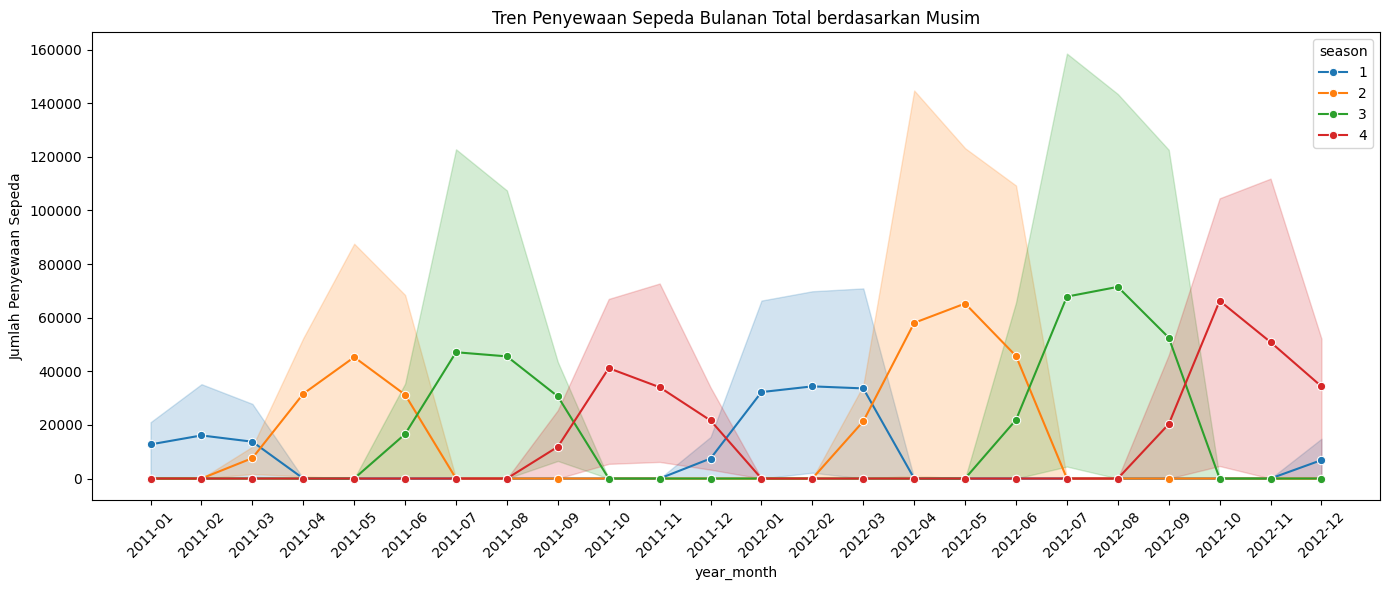

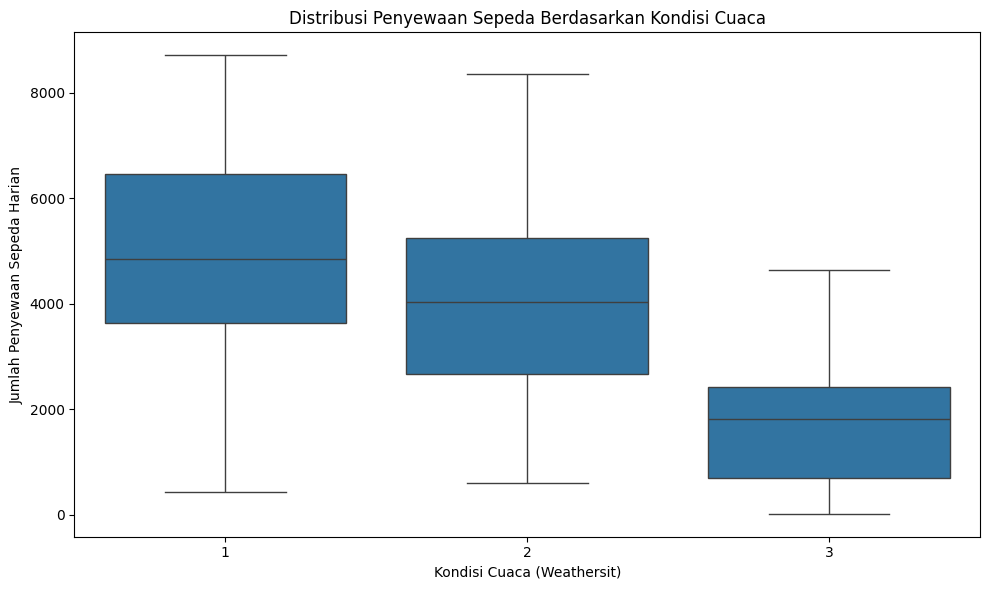

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data dengan kolom yang diperlukan
df_seasonal = df_day[['dteday', 'cnt', 'registered', 'casual', 'season', 'weathersit']].copy()
df_seasonal['dteday'] = pd.to_datetime(df_seasonal['dteday'])
df_seasonal['year_month'] = df_seasonal['dteday'].dt.to_period('M').astype(str)

# Agregasi bulanan untuk total, registered, casual
df_agg = df_seasonal.groupby(['year_month', 'season', 'weathersit'])[['cnt', 'registered', 'casual']].sum().reset_index()

# Visualisasi total, registered, casual per musim
plt.figure(figsize=(14,6))
sns.lineplot(data=df_agg, x='year_month', y='cnt', hue='season', marker='o')
plt.title("Tren Penyewaan Sepeda Bulanan Total berdasarkan Musim")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.tight_layout()
plt.show()

# Visualisasi per kondisi cuaca 
plt.figure(figsize=(10,6))
sns.boxplot(data=df_seasonal, x='weathersit', y='cnt')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (Weathersit)")
plt.ylabel("Jumlah Penyewaan Sepeda Harian")
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana proporsi penyewaan sepeda oleh pengguna terdaftar dan kasual bervariasi antara hari kerja/akhir pekan dan kondisi cuaca, serta rekomendasi strategis apa yang dapat diberikan?

In [195]:
# Salin DataFrame dan kolom yang dibutuhkan termasuk weekday dan weathersit
df_user = df_day[['dteday', 'casual', 'registered', 'cnt', 'weekday', 'weathersit']].copy()

# Konversi kolom tanggal ke datetime
df_user['dteday'] = pd.to_datetime(df_user['dteday'])

# Tentukan tipe hari
df_user['day_type'] = df_user['weekday'].apply(lambda x: 'Hari Kerja' if x < 5 else 'Akhir Pekan')

# Hitung persentase kontribusi masing-masing pengguna per baris
df_user['casual_pct'] = (df_user['casual'] / df_user['cnt']) * 100
df_user['registered_pct'] = (df_user['registered'] / df_user['cnt']) * 100

# Agregasi rata-rata persentase kontribusi berdasarkan hari dan kondisi cuaca
df_agg_pct = df_user.groupby(['day_type', 'weathersit'])[['casual_pct', 'registered_pct']].mean().reset_index()

# Tampilkan hasil
print(df_agg_pct)


      day_type weathersit  casual_pct  registered_pct
0  Akhir Pekan          1   24.137188       75.862812
1  Akhir Pekan          2   18.942755       81.057245
2  Akhir Pekan          3   15.377551       84.622449
3   Hari Kerja          1   16.910201       83.089799
4   Hari Kerja          2   14.286731       85.713269
5   Hari Kerja          3    7.512866       92.487134


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14104\22928825.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_pct = df_user.groupby(['day_type', 'weathersit'])[['casual_pct', 'registered_pct']].mean().reset_index()


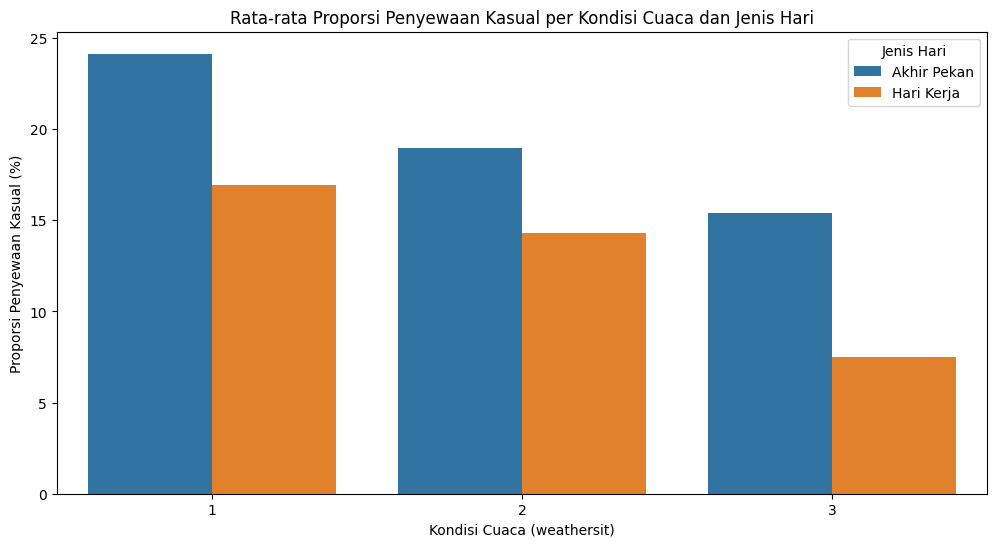

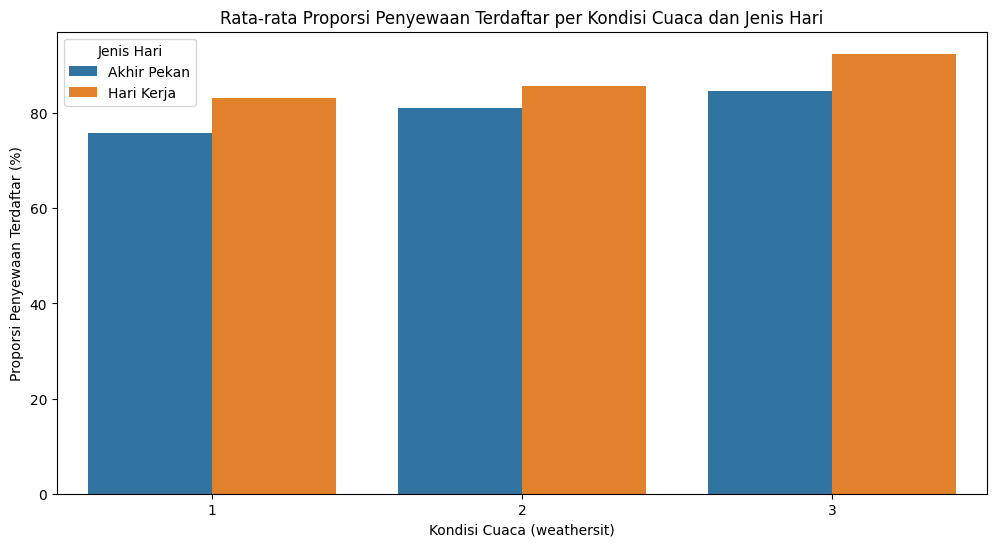

In [196]:
# Plot proporsi pengguna kasual berdasarkan day_type dan weathersit
plt.figure(figsize=(12,6))
sns.barplot(data=df_agg_pct, x='weathersit', y='casual_pct', hue='day_type')
plt.title('Rata-rata Proporsi Penyewaan Kasual per Kondisi Cuaca dan Jenis Hari')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Proporsi Penyewaan Kasual (%)')
plt.legend(title='Jenis Hari')
plt.show()

# Plot proporsi pengguna terdaftar dengan cara yang sama
plt.figure(figsize=(12,6))
sns.barplot(data=df_agg_pct, x='weathersit', y='registered_pct', hue='day_type')
plt.title('Rata-rata Proporsi Penyewaan Terdaftar per Kondisi Cuaca dan Jenis Hari')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Proporsi Penyewaan Terdaftar (%)')
plt.legend(title='Jenis Hari')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
    - Dari analisis tren penyewaan sepeda bulanan berdasarkan tahun dan musim, terlihat adanya pola musiman yang jelas. Penyewaan sepeda meningkat signifikan pada musim semi dan musim panas, sedangkan menurun pada musim gugur dan musim dingin, mengindikasikan pengaruh cuaca dan musim terhadap perilaku pengguna. Selain itu, tren jangka panjang menunjukkan peningkatan total penyewaan dari tahun ke tahun, yang dapat mencerminkan pertumbuhan minat terhadap penyewaan sepeda serta kemungkinan pengaruh kebijakan atau infrastruktur kota yang semakin mendukung mobilitas ramah lingkungan.
    - Visualisasi berdasarkan kondisi cuaca juga memperlihatkan bahwa penyewaan sepeda lebih tinggi pada kondisi cuaca yang baik (cerah atau berawan ringan), dan menurun saat cuaca buruk, memperkuat peran faktor cuaca dalam menentukan pola penggunaan.

- Conclution pertanyaan 2 :
    - Analisis proporsi penyewaan sepeda oleh pengguna terdaftar (registered) dan kasual (casual) menunjukkan bahwa pengguna terdaftar memberikan kontribusi mayoritas pada total penyewaan, dengan persentase yang lebih tinggi pada hari kerja. Hal ini mengindikasikan bahwa pengguna terdaftar menggunakan sepeda secara rutin untuk aktivitas sehari-hari seperti perjalanan kerja atau sekolah.
    - Sebaliknya, pengguna kasual lebih dominan pada akhir pekan dan hari libur, kemungkinan besar untuk tujuan rekreasi atau kegiatan santai. Proporsi kontribusi ini juga dipengaruhi oleh kondisi cuaca, di mana hari dengan cuaca baik cenderung meningkatkan aktivitas penyewaan, khususnya oleh pengguna kasual.
